In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('Set2')

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_data = pd.read_csv('energydata_complete.csv', sep=',')
df_data


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [35]:
print(df_data['Appliances'].describe())

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64


In [11]:
columnaNum = df_data.select_dtypes(include=[np.number])

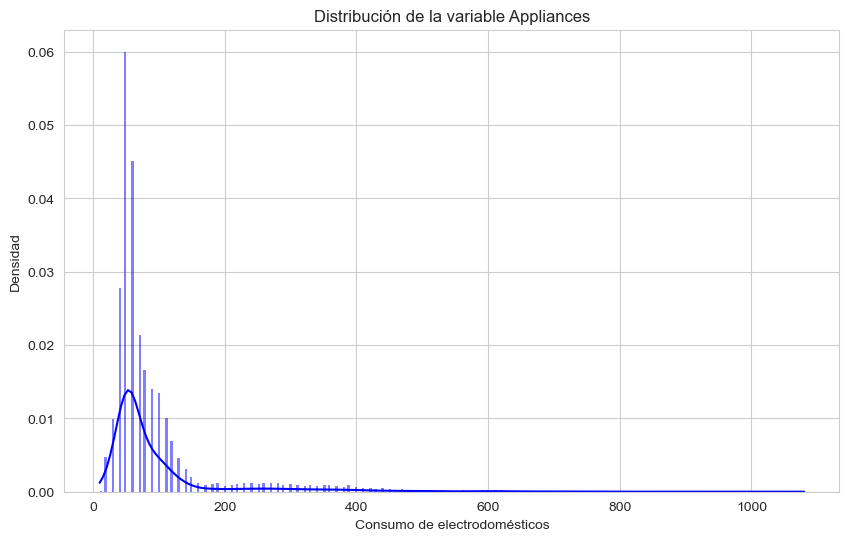

Asimetría (skewness): 3.39
Curtosis: 13.67


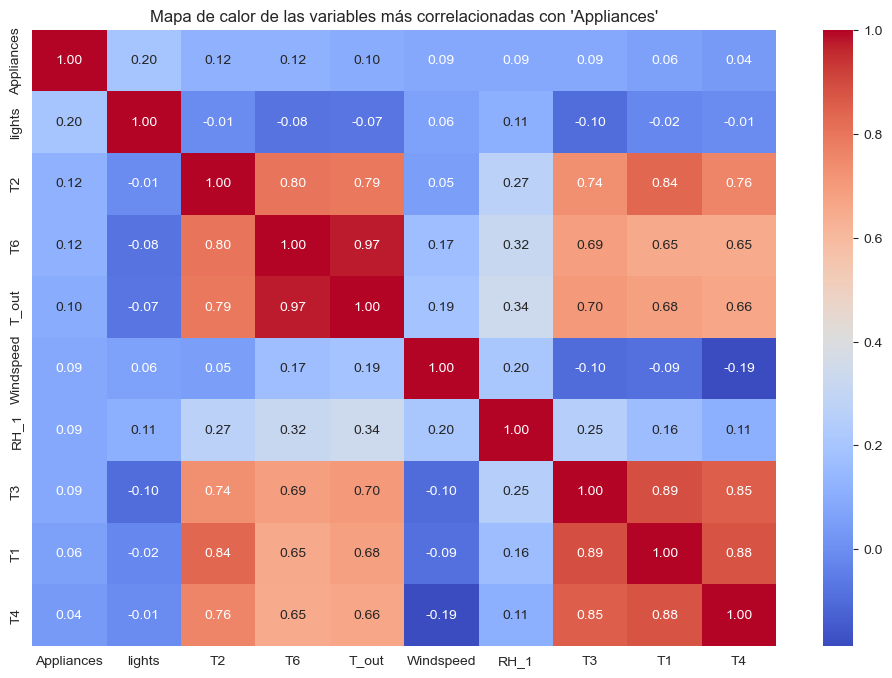

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_data['Appliances'], kde=True, color='blue', stat="density", linewidth=0)
plt.title('Distribución de la variable Appliances')
plt.xlabel('Consumo de electrodomésticos')
plt.ylabel('Densidad')
plt.show()

# Calcular asimetría (skewness) y curtosis (kurtosis) de la variable objetivo
asimetria = df_data['Appliances'].skew()
curtosis = df_data['Appliances'].kurt()
print(f"Asimetría (skewness): {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

# Calcular la correlación de todas las variables con 'Appliances'
correlacion_appliances = columnaNum.corr()['Appliances'].sort_values(ascending=False)

# Seleccionar las 10 variables más correlacionadas (excluyendo 'Appliances' si es necesario)
variables_top = correlacion_appliances.index[:10]

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_data[variables_top].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de las variables más correlacionadas con 'Appliances'")
plt.show()

In [16]:
X = columnaNum.drop(columns=['Appliances']) 
Y = columnaNum['Appliances']

escalador = StandardScaler()
X_scale = escalador.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (15788, 27)
Tamaño del conjunto de prueba: (3947, 27)


In [26]:
parametros_rf = {
    'max_depth': [10, 20],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 3],
    'n_estimators': [30, 50, 100],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=parametros_rf,
    cv=3,  # Validación cruzada con menos pliegues
    scoring='r2',
    n_jobs=-1
)

# Ajustar el modelo con los datos de entrenamiento
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [30, 50, 100]},
             scoring='r2')

Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


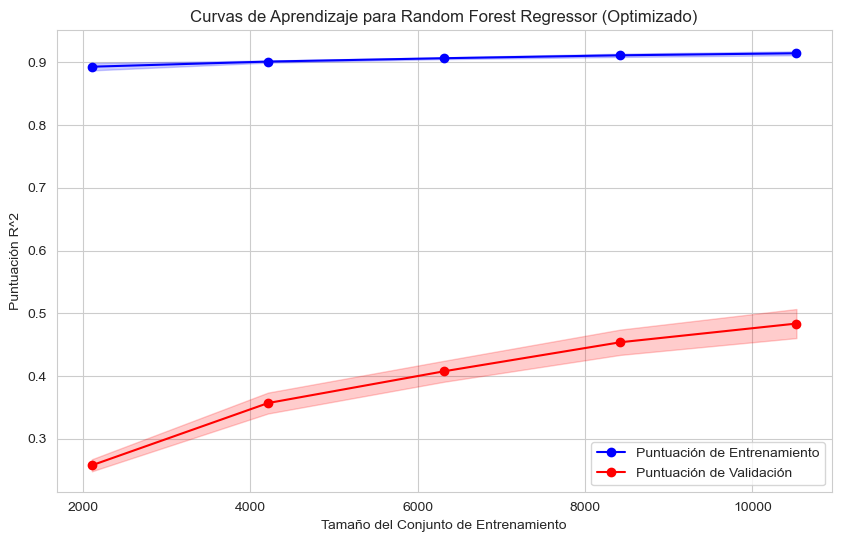

In [27]:
# Extraer el mejor modelo encontrado
mejor_modelo_rf = grid_rf.best_estimator_
print(f"Mejores parámetros: {grid_rf.best_params_}")

# Generar la curva de aprendizaje con menos tamaños de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo_rf,
    X_train, y_train,
    cv=3,  # Reducido de 5 a 3 pliegues
    train_sizes=np.linspace(0.2, 1.0, 5),  # Solo 5 tamaños (20%, 40%, ..., 100%)
    scoring='r2',
    n_jobs=-1
)

# Calcular el promedio y la desviación estándar
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuación de Entrenamiento", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Puntuación de Validación", color='red', marker='o')

# Agregar sombras para la desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

# Etiquetas y título
plt.title('Curvas de Aprendizaje para Random Forest Regressor (Optimizado)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación R^2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [28]:
rf_pred = grid_rf.predict(X_test)
def evaluar_modelo(y_real, y_predicho):
    mae = mean_absolute_error(y_real, y_predicho)
    mse = mean_squared_error(y_real, y_predicho)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_predicho)
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    return mae, mse, rmse, r2

# Evaluar Random Forest
print("\nDesempeño de Random Forest:")
evaluar_modelo(y_test, rf_pred)

# Mostrar los resultados de Random Forest
import pandas as pd
resultados_rf = {
    "Modelo": ["Random Forest"],
    "MAE": [mean_absolute_error(y_test, rf_pred)],
    "MSE": [mean_squared_error(y_test, rf_pred)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, rf_pred))],
    "R^2": [r2_score(y_test, rf_pred)]
}

resultados_df_rf = pd.DataFrame(resultados_rf)
print(resultados_df_rf)



Desempeño de Random Forest:
MAE: 31.93
MSE: 4420.25
RMSE: 66.48
R^2: 0.56
          Modelo        MAE          MSE       RMSE       R^2
0  Random Forest  31.930649  4420.253739  66.484989  0.558288


In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en los conjuntos de entrenamiento y prueba
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

# Evaluar el desempeño en el conjunto de entrenamiento
print("\nDesempeño en el conjunto de entrenamiento:")
evaluar_modelo(y_train, train_pred)

# Evaluar el desempeño en el conjunto de prueba
print("\nDesempeño en el conjunto de prueba:")
evaluar_modelo(y_test, test_pred)

# Diferencia en R^2 entre entrenamiento y prueba
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
print(f"\nDiferencia en R^2 (Entrenamiento - Prueba): {r2_train - r2_test:.2f}")

# Diagnóstico basado en la diferencia
if r2_train > 0.8 and (r2_train - r2_test) > 0.1:
    print("Posible overfitting detectado.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("Posible bias (subajuste) detectado.")
else:
    print("El modelo parece balanceado entre bias y varianza.")


Desempeño en el conjunto de entrenamiento:
MAE: 12.71
MSE: 712.80
RMSE: 26.70
R^2: 0.93

Desempeño en el conjunto de prueba:
MAE: 32.89
MSE: 4678.15
RMSE: 68.40
R^2: 0.53

Diferencia en R^2 (Entrenamiento - Prueba): 0.40
Posible overfitting detectado.
